In [5]:
import json
import pandas as pd
import numpy as np

ETFS_PATH_V3 = "../../data/etf_data_v3.json"

def load_data(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return pd.DataFrame(data)

def analyze_missing_values(df):
    # Replace "Not Available" with np.nan
    # df.replace("Not Available", np.nan, inplace=True)
    df.replace("nan", np.nan, inplace=True)
    
    # Calculate missing values for each field
    missing_by_field = df.isna().sum().sort_values(ascending=False)
    
    # Calculate missing values for each row
    missing_by_row = df.isna().sum(axis=1).sort_values(ascending=False)
    
    return missing_by_field, missing_by_row

# Load data
df = load_data(ETFS_PATH_V3)

# Analyze missing values
missing_by_field, missing_by_row = analyze_missing_values(df)

# Print missing values
print("Missing values by field:")
print(missing_by_field)

print("\nMissing values by row:")
print(missing_by_row)


/tmp/ipykernel_94828/1011315679.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("nan", np.nan, inplace=True)


Missing values by field:
figi                       12224
domicile                   12224
total_return_1y            12224
tot_ret_ytd                12224
fund_style                   267
economic_association         267
fund_market_cap_focus        267
description                   49
fund_asset_group              12
manager                        7
fund_objective                 4
fund_strategy                  3
asset_class_focus              1
aggregated_value_traded        0
open_interest                  0
short_interest                 0
aggregated_volume              0
bid_ask_spread                 0
volume_1d                      0
return_10y                     0
return_5y                      0
total_value_traded             0
etf_name                       0
implied_liquidity              0
inception_date                 0
inception_year                 0
ytd_return                     0
use_derivative                 0
payment_type                   0
leverage          

In [2]:
def transform_inception_year(year):
    if pd.isna(year):
        return year
    elif len(year) == 2:
        year_int = int(year)
        if year_int <= 23:  # Assuming current year is 2023, adjust as needed
            return f"20{year}"
        else:
            return f"19{year}"
    return year

df['inception_year'] = df['inception_year'].apply(transform_inception_year)

# Verify changes
print(df[['inception_year']].head())


  inception_year
0           1993
1           2000
2           2010
3           2001
4           1999


In [6]:
def analyze_missing_values(df):
    df.replace("Not Available", np.nan, inplace=True)
    total_records = len(df)
    
    # Calculate missing values for each field
    missing_by_field = df.isna().sum().sort_values(ascending=False)
    missing_by_field_percentage = (missing_by_field / total_records) * 100
    
    missing_by_field_df = pd.DataFrame({
        'Not Available Values': missing_by_field,
        'Percentage': missing_by_field_percentage
    })
    
    # Calculate missing values for each row
    missing_by_row = df.isna().sum(axis=1).sort_values(ascending=False)
    
    return missing_by_field_df, missing_by_row

# Load data
df = load_data(ETFS_PATH_V3)

# Analyze missing values
missing_by_field_df, missing_by_row = analyze_missing_values(df)

# Print Not Available values by field with percentage
print("Not Available values by field with percentage:")
print(missing_by_field_df)


Missing values by field with percentage:
                         Missing Values  Percentage
open_interest                     10476   85.700262
return_10y                         9555   78.165903
short_interest                     8693   71.114202
implied_liquidity                  6837   55.930955
return_5y                          6623   54.180301
yield_12m                          6368   52.094241
payment_type                       5692   46.564136
return_3y                          4782   39.119764
nav_trk_error                      3427   28.035013
class_assets                       2330   19.060864
expense_ratio                      1997   16.336715
holdings                           1634   13.367147
aggregated_volume                  1206    9.865838
aggregated_value_traded            1205    9.857657
total_value_traded                 1205    9.857657
bid_ask_spread                     1106    9.047775
year_to_date_return                 790    6.462696
ytd_return             

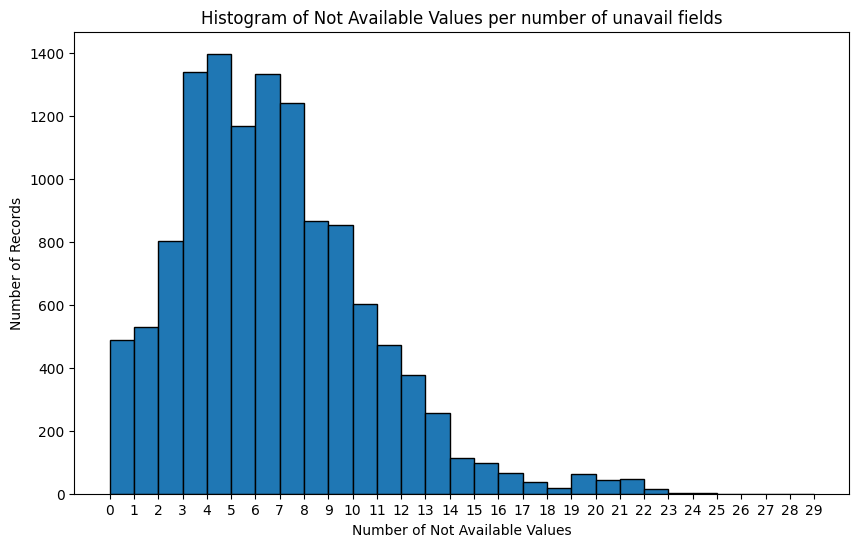

In [12]:
import matplotlib.pyplot as plt

def plot_missing_values_histogram(missing_by_row):
    plt.figure(figsize=(10, 6))
    plt.hist(missing_by_row, bins=range(0, 30), edgecolor='black')
    plt.title('Histogram of Not Available Values per number of unavail fields')
    plt.xlabel('Number of Not Available Values')
    plt.ylabel('Number of Records')
    plt.xticks(range(0, 30))
    plt.show()

# Plot the histogram
plot_missing_values_histogram(missing_by_row)


In [13]:
# Remove specified fields
fields_to_remove = ['figi', 'domicile', 'total_return_1y', 'tot_ret_ytd', 'open_interest', 'return_10y']
df.drop(columns=fields_to_remove, inplace=True)

# Verify the removal
print(f"Columns after removal: {df.columns}")

Columns after removal: Index(['etf_name', 'ticker', 'bbg_ticker', 'description', 'fund_type',
       'manager', 'asset_class_focus', 'fund_asset_group',
       'fund_industry_focus', 'fund_geographical_focus', 'fund_objective',
       'economic_association', 'fund_strategy', 'fund_market_cap_focus',
       'fund_style', 'class_assets', 'fund_assets', 'expense_ratio',
       'year_to_date_return', 'yield_12m', 'volume_30d', 'ytd_flow', 'flow_1m',
       'nav_trk_error', 'holdings', 'primary', 'return_1d', 'return_mtd',
       'ytd_return', 'return_3y', 'return_5y', 'volume_1d',
       'aggregated_volume', 'aggregated_value_traded', 'short_interest',
       'total_value_traded', 'bid_ask_spread', 'implied_liquidity',
       'inception_date', 'inception_year', 'use_derivative', 'payment_type',
       'leverage', 'structure', 'avg_bid_ask_spread'],
      dtype='object')


In [23]:
fields_to_remove = [
    'figi', 'domicile', 'total_return_1y', 'tot_ret_ytd',
    'short_interest', 'implied_liquidity', 'return_5y', 'yield_12m'
]
df.drop(columns=fields_to_remove, inplace=True)


In [32]:
def analyze_missing_values(df):
    df.replace("Not Available", np.nan, inplace=True)
    df.replace("nan", np.nan, inplace=True)
    total_records = len(df)
    
    # Calculate missing values for each field
    missing_by_field = df.isna().sum().sort_values(ascending=False)
    missing_by_field_percentage = (missing_by_field / total_records) * 100
    
    missing_by_field_df = pd.DataFrame({
        'Not Available Values / nan': missing_by_field,
        'Percentage': missing_by_field_percentage
    })
    
    # Calculate missing values for each row
    missing_by_row = df.isna().sum(axis=1).sort_values(ascending=False)
    
    return missing_by_field_df, missing_by_row


In [38]:
missing_by_field, missing_by_row = analyze_missing_values(df)

# Print missing values
print("Missing values by field:")
print(missing_by_field)

print("\nMissing values by row:")
print(missing_by_row)


Missing values by field:
                         Not Available Values / nan  Percentage
payment_type                                   5692   46.564136
return_3y                                      4782   39.119764
nav_trk_error                                  3427   28.035013
class_assets                                   2330   19.060864
expense_ratio                                  1997   16.336715
holdings                                       1634   13.367147
aggregated_volume                              1206    9.865838
aggregated_value_traded                        1205    9.857657
total_value_traded                             1205    9.857657
bid_ask_spread                                 1106    9.047775
ytd_return                                      790    6.462696
year_to_date_return                             790    6.462696
avg_bid_ask_spread                              569    4.654777
volume_30d                                      357    2.920484
fund_assets    

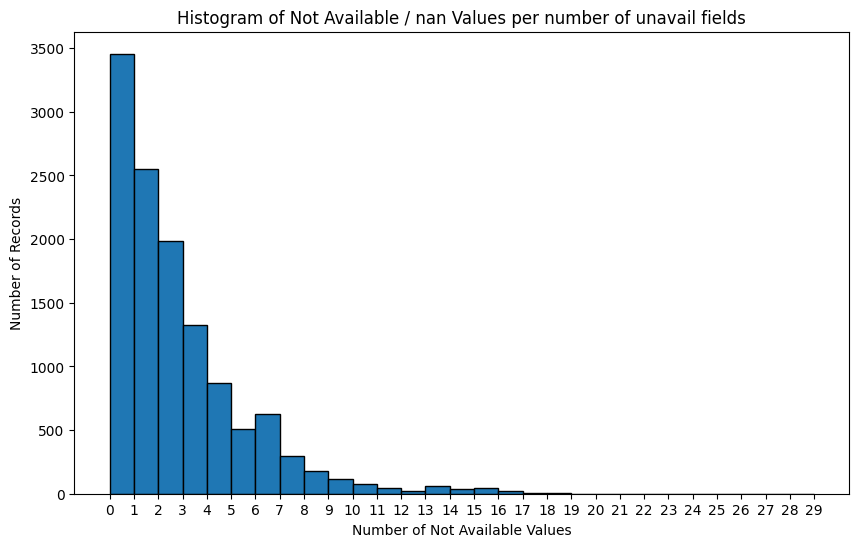

In [37]:
import matplotlib.pyplot as plt

def plot_missing_values_histogram(missing_by_row):
    plt.figure(figsize=(10, 6))
    plt.hist(missing_by_row, bins=range(0, 30), edgecolor='black')
    plt.title('Histogram of Not Available / nan Values per number of unavail fields')
    plt.xlabel('Number of Not Available Values')
    plt.ylabel('Number of Records')
    plt.xticks(range(0, 30))
    plt.show()

# Plot the histogram
plot_missing_values_histogram(missing_by_row)


In [45]:
(missing_by_row > 12).sum()


174

In [46]:
df_cleaned = df[missing_by_row <= 12]


/tmp/ipykernel_94828/3659929268.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df[missing_by_row <= 12]


In [49]:
# Print confirmation
print(f"Rows before cleaning: {len(df)}")
print(f"Rows after cleaning: {len(df_cleaned)}")


Rows before cleaning: 12224
Rows after cleaning: 12050


In [54]:
d1 =     {
        "etf_name":"SPDR S&P 500 ETF Trust",
        "ticker":"SPY",
        "bbg_ticker":"SPY US Equity",
        "description":"SPDR S&P 500 ETF Trust is an exchange-traded fund incorporated in the USA. The ETF tracks the S&P 500 Index. The Trust consists of a portfolio representing all 500 stocks in the S&P 500 Index. It holds predominantly large-cap U.S. stocks. This ETF is structured as a Unit Investment Trust and pays dividends on a quarterly basis. The holdings are weighted by market capitalization.",
        "fund_type":"ETF",
        "manager":"State Street Corp",
        "asset_class_focus":"Equity",
        "fund_asset_group":"Domestic Equity",
        "fund_industry_focus":"N.A.",
        "fund_geographical_focus":"United States",
        "fund_objective":"Large-cap",
        "economic_association":"N.A.",
        "fund_strategy":"Blend",
        "fund_market_cap_focus":"Large-cap",
        "fund_style":"N.A.",
        "class_assets":"514613.75",
        "fund_assets":"514613.75",
        "expense_ratio":"0.09%",
        "year_to_date_return":"+9.92%",
        "volume_30d":"68217120",
        "ytd_flow":"-24543.06",
        "flow_1m":"-7267.63",
        "nav_trk_error":"0.0224%",
        "holdings":"504.0",
        "primary":"primary",
        "return_1d":"+0.13%",
        "return_mtd":"+3.76%",
        "ytd_return":"+9.92%",
        "return_3y":"+9.21%",
        "volume_1d":"52233171",
        "aggregated_volume":"52326300",
        "aggregated_value_traded":"27254010699",
        "total_value_traded":"27254010699",
        "bid_ask_spread":"0.01",
        "inception_date":"01/22/93",
        "inception_year":"93",
        "use_derivative":"No",
        "payment_type":"Income",
        "leverage":"does not use leverage",
        "structure":"Unit Investment Trust (UIT)",
        "avg_bid_ask_spread":"0.00%"
    }
d2 =     {
        "etf_name": "YLETF 4D Nasdaq 100",
        "ticker": "YELNF3",
        "bbg_ticker": "YELNF3 IT Equity",
        "figi": "nan",
        "description": "YLETF 4D Nasdaq 100 Fund is an Exchange-Traded Fund incorporated in Israel. The Fund seeks to track the performance of the NASDAQ 100 - NTR index.",
        "fund_type": "ETF",
        "domicile": "nan",
        "manager": "Yelin Lapidot Holdings Managem",
        "asset_class_focus": "Equity",
        "fund_asset_group": "Global Equity",
        "fund_industry_focus": "N.A.",
        "fund_geographical_focus": "United States",
        "fund_objective": "N.A.",
        "economic_association": "N.A.",
        "fund_strategy": "Blend",
        "fund_market_cap_focus": "Large-cap",
        "fund_style": "N.A.",
        "tot_ret_ytd": "nan",
        "total_return_1y": "nan",
        "class_assets": "Not Available",
        "fund_assets": "8.13",
        "expense_ratio": "0.02%",
        "year_to_date_return": "Not Available",
        "yield_12m": "Not Available",
        "volume_30d": "5649",
        "ytd_flow": "5.64",
        "flow_1m": "0.01",
        "nav_trk_error": "Not Available",
        "holdings": "24.0",
        "primary": "primary",
        "return_1d": "0%",
        "return_mtd": "+0.65%",
        "ytd_return": "Not Available",
        "return_3y": "Not Available",
        "return_5y": "Not Available",
        "return_10y": "Not Available",
        "volume_1d": "0",
        "aggregated_volume": "Not Available",
        "aggregated_value_traded": "Not Available",
        "short_interest": "Not Available",
        "open_interest": "Not Available",
        "total_value_traded": "Not Available",
        "bid_ask_spread": "21",
        "implied_liquidity": "Not Available",
        "inception_date": "01/15/24",
        "inception_year": "24",
        "use_derivative": "No",
        "payment_type": "Income",
        "leverage": "does not use leverage",
        "structure": "Open-End Investment Company",
        "avg_bid_ask_spread": "0.36%"
    }

In [61]:
deleted = set(d1) ^ set(d2)
deleted

{'domicile',
 'figi',
 'implied_liquidity',
 'open_interest',
 'return_10y',
 'return_5y',
 'short_interest',
 'tot_ret_ytd',
 'total_return_1y',
 'yield_12m'}

In [70]:
def clean_strings(df):
    # Iterate over each column in the DataFrame
    for col in df.select_dtypes(include=['object']).columns:
        # Replace backslashes
        df[col] = df[col].str.replace(r'\\', '', regex=True)
        # Replace escaped forward slashes
        df[col] = df[col].str.replace(r'\/', '/', regex=True)
        # Replace escaped double quotes
        df[col] = df[col].str.replace(r'\"', '"', regex=True)
    return df


In [71]:
cleaned_df = clean_strings(df_cleaned)

/tmp/ipykernel_94828/3836148336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace(r'\\', '', regex=True)
/tmp/ipykernel_94828/3836148336.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace(r'\/', '/', regex=True)
/tmp/ipykernel_94828/3836148336.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [86]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
df = cleaned_df

# List of fields to check
fields_to_check = [
    'avg_bid_ask_spread', 'bid_ask_spread', 'expense_ratio', 
    'nav_trk_error', 'return_3y', 'return_mtd', 
    'ytd_return'
]

# Function to check and append '%' if necessary
def append_percentage(value):
    if isinstance(value, str) and value.replace('.', '', 1).isdigit() and not value.endswith('%'):
        return value + '%'
    return value

# Apply the function to each field in each row
for field in fields_to_check:
    df[field] = df[field].apply(append_percentage)

# Print the updated DataFrame
print(df)


                                  etf_name   ticker         bbg_ticker  \
0                   SPDR S&P 500 ETF Trust      SPY      SPY US Equity   
1                 iShares Core S&P 500 ETF      IVV      IVV US Equity   
2                     Vanguard S&P 500 ETF      VOO      VOO US Equity   
3          Vanguard Total Stock Market ETF      VTI      VTI US Equity   
4               Invesco QQQ Trust Series 1      QQQ      QQQ US Equity   
...                                    ...      ...                ...   
12218  YLETF 4A Nasdaq 100 Currency Hedged   YELNF4   YELNF4 IT Equity   
12220              Amplify High Income ETF      YYY      YYY US Equity   
12221                   BMO All Equity ETF     ZEQT     ZEQT CN Equity   
12222                     Zerodha Gold Etf  ZGLDETF  ZGLDETF IN Equity   
12223     Zerodha Nifty 1D Rate Liquid ETF  ZN1RLET  ZN1RLET IN Equity   

                                             description fund_type  \
0      SPDR S&P 500 ETF Trust is an excha

/tmp/ipykernel_94828/1867005272.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[field] = df[field].apply(append_percentage)


In [88]:
df['inception_year'] = df['inception_year'].apply(transform_inception_year)

# Verify changes
print(df[['inception_year']].head())

  inception_year
0           1993
1           2000
2           2010
3           2001
4           1999


/tmp/ipykernel_94828/1652968176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inception_year'] = df['inception_year'].apply(transform_inception_year)


In [89]:
CLEANED_ETFS_PATH = "../../data/etf_data_v3.json"
df.to_json(CLEANED_ETFS_PATH, orient='records', indent=4)


In [84]:
import os

# Relative path to the file
CLEANED_ETFS_PATH = "../../data/etf_data_cleaned_v3.json"

# Get the full absolute path
full_path = os.path.abspath(CLEANED_ETFS_PATH)

print(full_path)


/home/bunt/FolioLLM/data/etf_data_cleaned_v3.json
